# Predicting VIX and Underlying Forces of Regime Switching Phenomenon
## Abstract
This paper aims to analyze the underlying features of the regime switching phenomenon, and attempts to build a modle to predict VIX given category-specific values of EMV. When analyzing VIX, a Gaussian mixture model will be built to explain the distribution of VIX, which reveals the regime-switching nature of the stock market. When building the model to predict VIX, tools and techniques such as RSME, Adjusted R-squared value, and Cross Validation were used. In the end, the EMV data was split into 2 categories -- stable and unstable -- and different factors that affect VIX will be discovered.

## Introduction
### Introduction to VIX
According to Investopia, "The Cboe Volatility Index (VIX) is a real-time index that represents the market’s expectations for the relative strength of near-term price changes of the S&P 500 index (SPX)".[1] In another artical on the Investopia website, "It is a measure of the level of implied volatility, not historical or statistical volatility, of a wide range of options, based on the S&P 500. This indicator is known as the "investor fear gauge," because it reflects investors' best predictions of near-term market volatility , or risk. In general, VIX starts to rise during times of financial stress and lessens as investors become complacent. It is the market's best prediction of near-term market volatility".[2]     
However, we would like to take note of the limitations of the VIX. According to an article in Seeking Alpha, "It is potentially highly misleading to infer anything beyond a truly near-term period however. Even as the near-term options implied a serious spike in risk, the longer-dated options on SPY were telling a far more nuanced story."[3] To sum up, the VIX is a good indicator for near-term market volatility, but might be misleading to infer to a long-term volatility, or when there are dramatic spikes in risk.   
   
### Introduction to Predicting VIX
Numerous efferts had been made to predict VIX. Bai, Yunfei and Cai, Charlie Xiaowu for example, created a three step automated adaptive training network to predict VIX and discussed the outcomes in a paper[4]. They stated that the most important role is still played by humans, since humans need to choose the data and translate that to a form machines could understand. The paper further stresses the limitations of the method: "a machine cannot learn what is not in the data." It further states that "the true spectacular movement in the VIX would not be predictable (at least with public information we gather from the financial market)"[4]. Due to this, it's impossible to forecast the stock market accurately. However, since we have data such as categories of EMV that correlates to VIX, it's possible to predict VIX to a certain degree. We will address some of the limitations of 
in the Conclusion part of the paper after we experience them.   

### Overview of analysis
In the following paper, first we will dig deep into VIX. We try to model the log monthly returns of VIX by Mixture of Gaussian Distributions. We later on find the mcp at each observation and create a probability transition matrix, which uncovers the nature of the regime-switching phenomenon. Next, we preprocess the data by feature selection, dropping outliers, data transformation, and standardization. After all this we finally try to predict VIX using four regression methods: OLS, LASSO, Ridge Regression, and Elastic Net. This is proceeded by tuning the parameters and evaluating these models mainly using RMSE and Adjusted squared value. In the end, we divide all data into two categories: stable and unstable, and discover what are the features that affect VIX.

## Model Specification - 1: Deeper Understanding of the data

### Investigating the Stock Market Regimes
### Overview
Before building a model to forcast VIX, we need to learn more about how VIX distributes. In other words, we would like to investigate the stock market's regimes. In order to achieve that, we perform the following steps. First, we define the model, the parameters, and the loss function for finding the best model to identify the regimes. Second, we use the derivative-free optimization GA solver to learn the parameters of the model (MoG) for each components of the Gaussian mixture distribution. Third, we decide the correct number of regimes, denoted by k*. Fourth, we find the mcp(maximum conditional probability) for each observation and derive a k* by k* probability transition matrix M, where M_ij denotes the probability of regime "i" transitioning to regime "j".
### Defining model, parameters, and loss function
In this paper, we use the Gaussian mixture model. We chose this model because it performs well when dealing with overlapping distributions. The following is a graph of VIX for better understanding of what our desired model describes. The code used for generating this graph could be seen in Appendix 1. 

[Text(0.5, 0, 'Monthly Log Returns of VIX'),
 Text(0, 0.5, 'Number of Occurrences')]

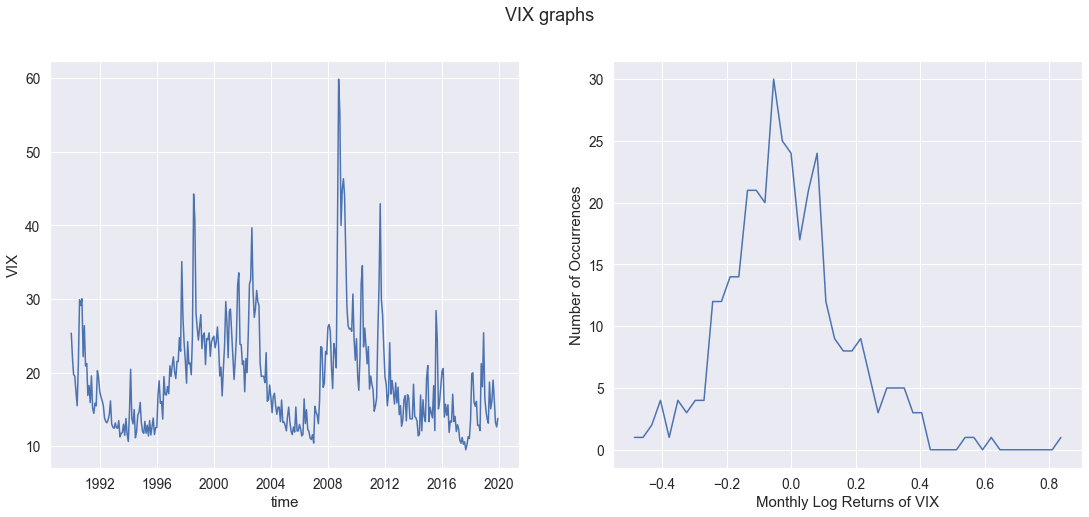

In [153]:
# Appendix 1

The following is how we will be defining our model and parameters, as described in Dr. Ataei's handout [5]    
![our model](./pictures/distribution.jpg)     
In addition, our we define our loss functions as follows.    
![loss function](./pictures/loss.jpg)    
Notice that the number of bins is set to 50, which is approximately 2% of the range of the monthly log returns of VIX.

### Learn the Parameters of MoG
Since we have the loss function, now we're able to learn the parameters of MoG for each component of the mixture distribution using the derivative-free optimization Genetic Algorithm (GA) solver. Notice that the number of gaussian distributions in a mixture distribution is denoted by "k". We show the output of the GA solver down below. Please see Appendix 2 for corresponding code, and Appendix 3 for details on techniques to ensure π_i sum up to 1.

- k = 1     
![results when k = 1](./pictures/kkk1.jpg)      
- k = 2:    
![results when k = 2](./pictures/kkk2.jpg)    
- k = 3:     
![results when k = 3](./pictures/kkk3.jpg)    
- k = 4:    
![results when k = 4](./pictures/kkk4.jpg)    
- k = 5:    
![results when k = 5](./pictures/kkk5.jpg)    
   
  
Notice that the parameters we estimated above are not directly equivelent to the parameters of our loss function, θ. After some modifying (please see details in Appendix 4), we obtain the following results.    
![MoG param talbe](./pictures/mog_table_1.jpg) 


### Choosing k*, the Correct Number of Regimes
As seen in the table above, we see that k = 3, 4, 5 yield better results, with k = 4 being the best. Intuitively, we would choose k = 4 as the correct number of the components. However, it is still possible that k = 3, 4, 5 all yield a bad result. Here we want to confirm that this is not the case. We do this by doing the Chi Square Goodness-of-fit test. Since the asymptotic distribution of the objective function has a χ^2 distribution with (m - 3*k - 1) degrees of freedom, l(θ\*) is our Chi-Square score and we could compute the p-value. Here we set the significance level to 0.05, which means our model based on k-regimes will get accepted if the p-value is greater than 0.05. With the help of an online tool from Social Science Statistics[6], we obtain the following table (please see Appendix 5 for snipshots)
![MoG param talbe](./pictures/k_table_2.jpg) 
    
As shown above, k = 1, 2, 3, 4, 5 are accepted, which means the p-value is greater than 0.05 and the result is insignificant when p < 0.05. Among them, k = 3 has the largest p-value, much larger than others. In addition, although k = 3 doesn't have the lowest value for the objective function, they're pretty close (with a difference less than 0.6). Lastly, k = 3 is the one with the least complexity among k = 3, 4, 5, which means it's more likely to avoid overfitting. Therefore, we choose the correct number of regimes k* to be 3.

### Finding Maximum Conditional Probabiltiy (Mcp) and compute k\* X k\* Transition Matrix
Define Mcp and the Transition Matrix as stated in Dr. Ataei's handout[5].   
![definition of mcp and S](./pictures/def_of_S.jpg)   
By using the above definitions, we were able to obtain the mcp for each observation. Note that this forms a long list. The following is a snipshot of a part of the list.
![mcp list](./pictures/mcp_k3.jpg)   
for each tuple, the first element represents the label of the regime (ranging from 0 to 2), and the second element represents the corresponing mcp.   
Now we want to find the transition matrix. Recall that in transition matrix M, M_ij represents the probabiltiy that regime i switch to regime j (i, j belongs to {0, 1, 2}).  The details and code of finding the mcp list and the transition matrix could be found in Appendix 6. In short, we take the average of the probability that regime i switches to regime j for each M_ij. We obtain the following transition matrix:
![transition matrix](./pictures/trans_matrix_k3.jpg)   


### Possible reasons of Switching Regime Phenomenon
In the above transition matrix, we observed that it is somewhat possible that regimes switch to other ones. We could see this by noticing that the diagonal ranges between 0.59 and 0.75, indicating that we have a chance of 25% to 41% that regime-switching happens. Recall that S_t denotes the state of X_t (monthly log-returns of VIX). For example, if S_t == 1, VIX goes up, if S_t == -1, VIX goes down, and if S_t == 0, VIX stays the same. This is just an example, but our point here is that each regime is a state, and the fact that there's a 25% to 41% chance for regime-switching to happen means that stock markets change fast. This could be seen from the graph of VIX-Time earlier: The lines "zigzag" a lot.   
The reasons behind this switching-regime phenomenon are countless. The main reason that comes to mind is that we are living in a rapid society, and the people knows what's happening by the news: If there's a massive fire outbreak, a drop in oil prices, or a policy change in a certain region, stockholders would know what's happening immediately thanks to technology. With all these information, stockholders would have an idea on how those events impact the stock market, thus causing VIX to change rapidly.

## Model Specification - 2
### Overview
In this section, we will conduct data preprocessing and specify our candidate models. We will start from OLS and work through LASSO, Ridge Regression and Elastic Net Regression.       
Recall the four basic assumptions of Regression [8]:    
- Linearity: The relationship between X and the mean of Y is linear.
- Homoscedasticity: The variance of residual is the same for any value of X.
- Independence: Observations are independent of each other.
- Normality: For any fixed value of X, Y is normally distributed.

### Data preprocessing
First we introduce a new dataset: the EMV dataset. According to prof. Ataei's handout, "(This) is constructed by obtaining daily counts of articles containing at least one term in the categories economy or economic; uncertain or uncertainty; and one or more words from the equity market, equity price, stock market and stock price. It is noted that the U.S.-related articles used in the construction of EMV exceed 1000 newspapers and are retrieved from the Access World News’ NewsBank service."[5] This paragraph shows that the data is from a verifiable source.    
Notice that there are 46 different sets of data in EMV -- which is a lot.   
Before doing all the preprocessing, we divide the data into training data and test data with a ratio of 3:1. Next, we show the correlation matrix that includes the top 15 indexes that are relative to VIX. Code could be seen in Appendix 7.    

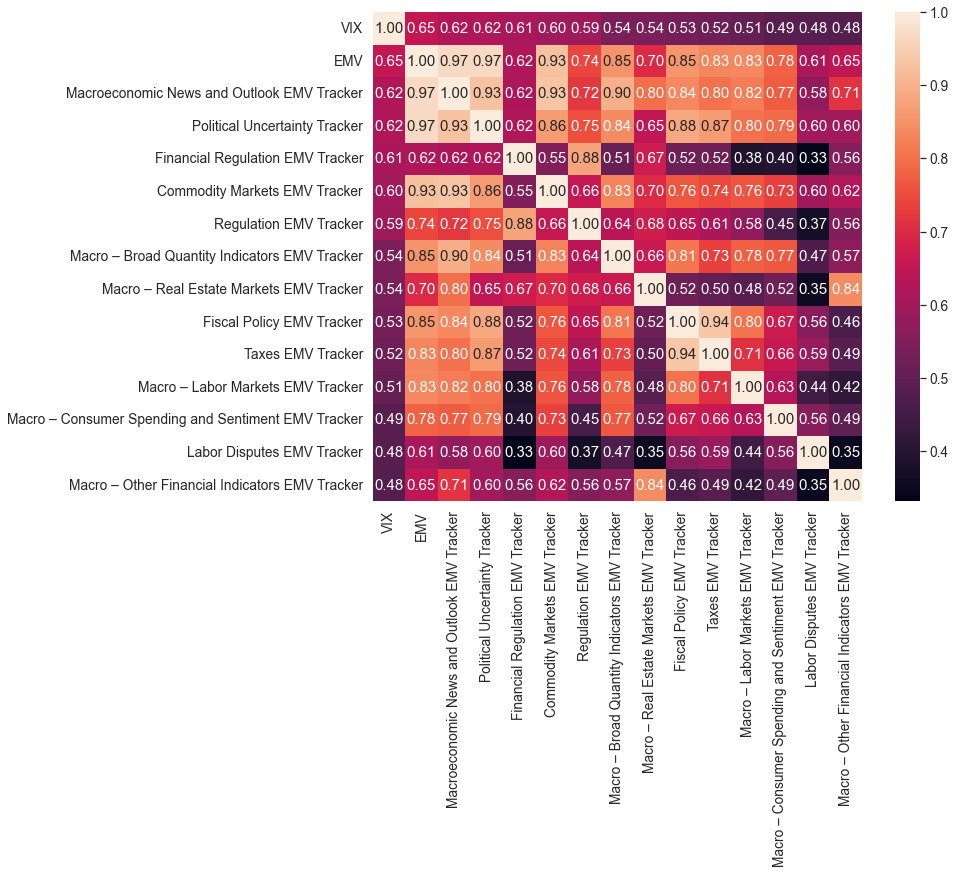

In [164]:
# Appendix 7

### feature selection
Here we decide the features to choose
- EMV (ranked 1st). 
- 'Financial Regulation EMV Tracker' (ranked 4th), since it has a high correlation with VIX and a relatively low correlation with EMV     
The reason ignored 'Macroeconomic News and Outlook EMV Tracker'(ranked 2nd) and 'Political Uncertainty Tracker'(ranked 3rd) is because they have a high correlation (0.97) with VIX. 
Notice that we want to avoid multicollinearity because regressions assumes that the variables are independent (recall the assumptions of regression). If we overlook this and just choose the top four feature variables, then our model will be more complex and inaccurate.
Here we also drop all other features.    
(code in Appendix 8)

In [117]:
# Appendix 8

### Removing outliers
Here we remove the outliers. First we show the relation between EMV, 'Financial Regulation EMV Tracker', and VIX. Code in Appendix 9.

<AxesSubplot:xlabel='Financial Regulation EMV Tracker'>

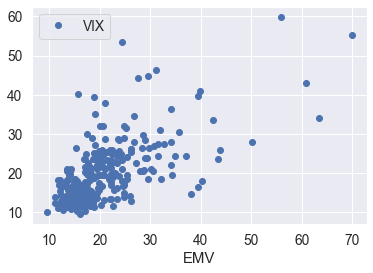

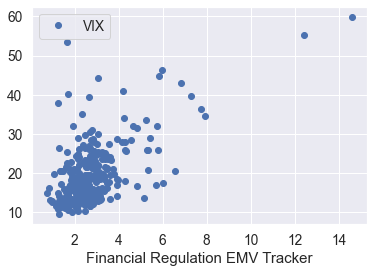

In [118]:
# Appendix 9

Notice that we want to make the above graphs to be more linear, for the sake of the "linearity" assumption of the "four assumptions of regression". To do so we remove the outliers (dots at top left and bottom right of the two graphs).
- for 'EMV', we remove the dots that satisfies:
  - 'EMV' < 25 and VIX > 40, and
- for 'Financial Regulation EMV Tracker', we remove the dots that satisfies:
  - 'Financial Regulation EMV Tracker' <2 and VIX > 35
Code in Appendix 10

<AxesSubplot:xlabel='Financial Regulation EMV Tracker'>

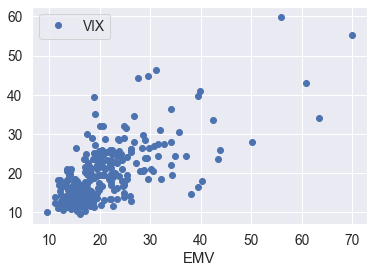

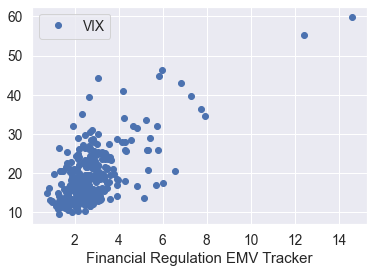

In [119]:
# Appendix 10


As shown, we have the outliers removed now. The plots look much more linear.

### Transformation
We also need our model to satisfy Normality. This means that we want our variables to be normally distributed.[8] The process of making our variables to be normally distributed is called transformation. We need to first see what our variables look like before deciding what transformations to apply.

c:\course\c11csc\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


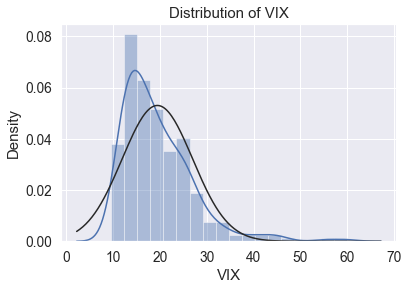

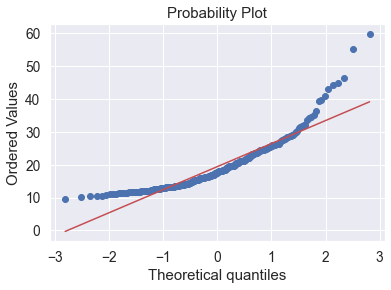

In [120]:
# Appendix 11

c:\course\c11csc\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


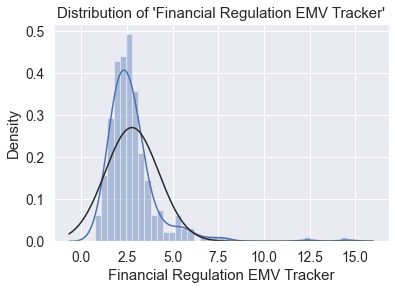

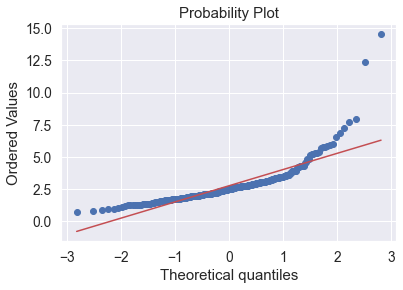

In [121]:
# Appendix 12

c:\course\c11csc\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


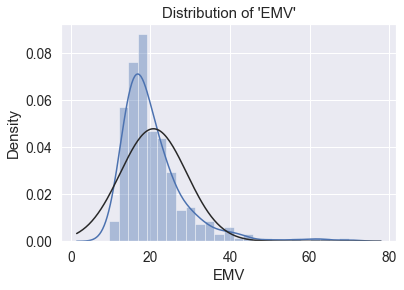

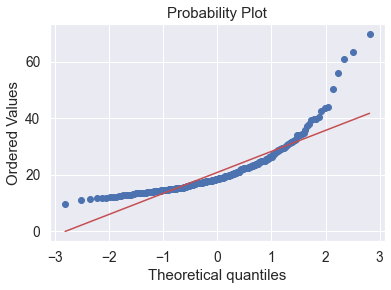

In [122]:
# Appendix 13

By looking at the histogram plot, we see that they all don't look exactly like a normal distribution. In addition, it has a "tail" on the right hand side. Observing the probability plot, the relation between ordered values and theoretical quantiles doesn't look linear. We come to a conclusion: this data has right skewness. Since it has severe right skewness (the tail is pretty long), we would want to use the log function to transform it instead of other methods for right skewness, such as reciprocals or taking roots. We apply this for all data.     
Notice that there are different choices of log for each EMV tracker. Details won't be discussed due to length, but a general rule of thumb is that: for strongness of fixing right skewness: log10 > log > square root, and the final decision is made based on trial and error.

-------------------------
 mean = 1.2618320950823603 sd =  0.1473545288162275


c:\course\c11csc\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


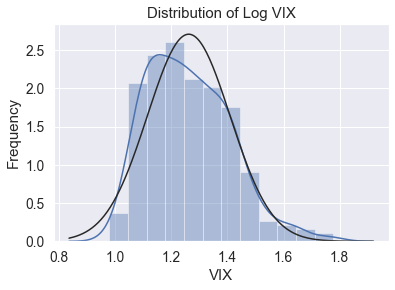

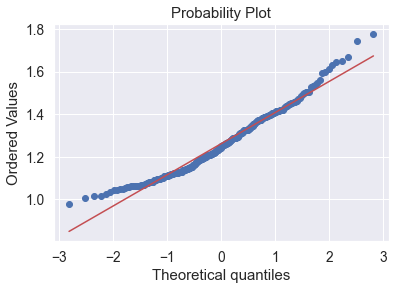

In [123]:
# Appendix 14

c:\course\c11csc\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


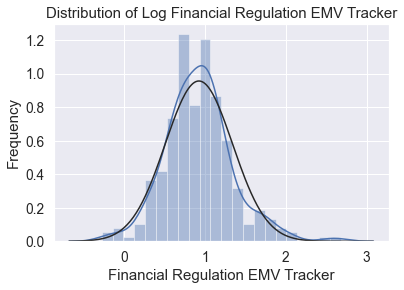

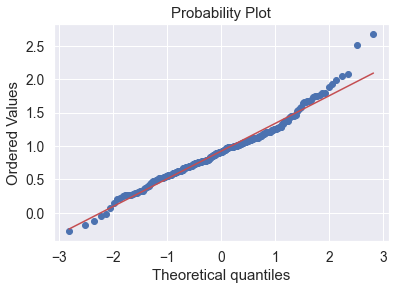

In [124]:
# Appendix 15

c:\course\c11csc\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


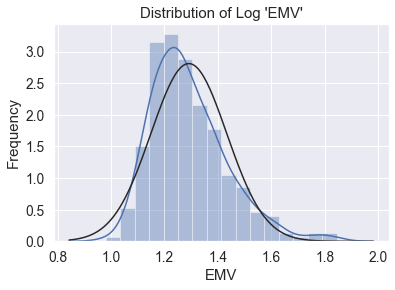

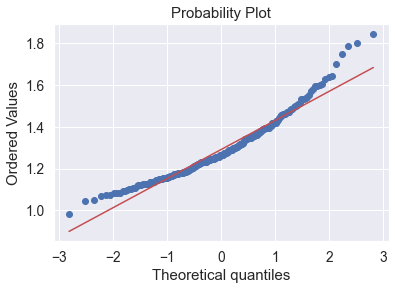

In [126]:
# Appendix 16

Now All dependent and independent variables looks more like a normal distribution

### standardization
Next we standardize the training set with its own mean and variance, and the test set using that of the training set. Notice that it is forbidden to standardize the test set using its own mean and variance, since that would make the meaning of "test set" pointless. For standardization, we use the formula X_scaled = (X - mean) / variance. We show the updated variance and the standardized plot of training and testing data below.

mean
 EMV                                 2.283215e-16
Financial Regulation EMV Tracker    2.793211e-16
dtype: float64
-------------------------------
variance
 EMV                                 1.0
Financial Regulation EMV Tracker    1.0
dtype: float64
-------------------------------
plot of X_train


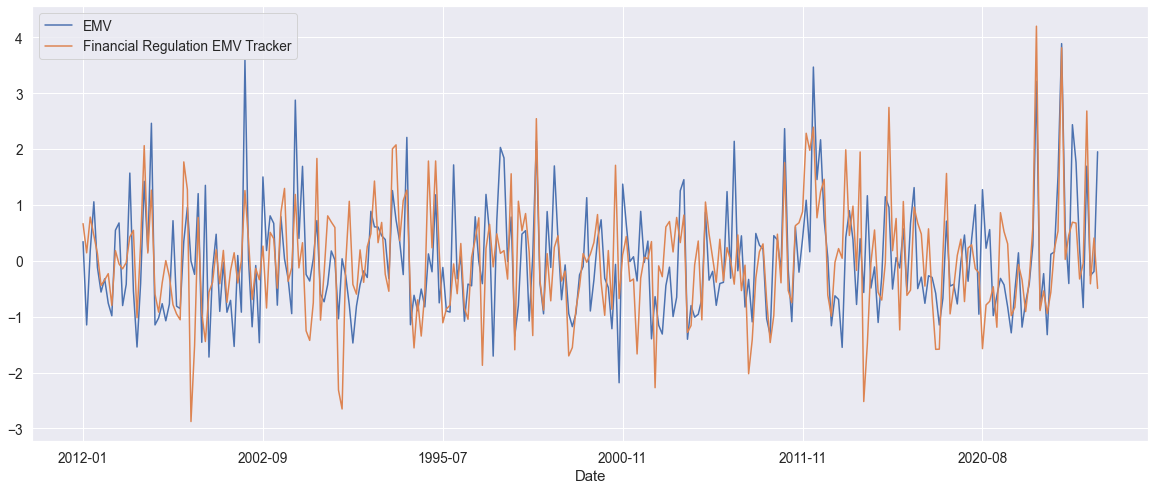

In [127]:
# Appendix 17


Notice that the updated variance are all 1. This satisfies the "Homoscedasticity" assumption of regression. In addition, the fact that updated mean are all 0 will help us when plotting relations between the independent variables and VIX.          
Also note that this action of rescaling isn't needed in OLS because it's invariant. However, for Lasso, Ridge, and elastic net, it does make a difference.

Now that we've satisfied the four basic assumptions of regression, and that we have transformed and standardized X_train and X_test, along with transformed y_train and y_test, we are ready to preceed to the regressions.

### OLS
The OLS is relatively simple. We now implement the model with sklearn. After creating the model, we plot the relationship between VIX and the 2 independent variables. When plotting for one independent variable, we fix the other independent variable's values to 0, which is the mean of all variables since we standardized them. Notice the plotted lines doesn't seem "slopey" enough for the points. This is because there is another independent variable that will impact our line, but we keep it at its mean.

In [135]:
# Appendix 18

--------------------------
coefficients are [0.48152802 0.32623006] constant is 6.965275987332686e-16 which approaches 0 
--------------------------
Index(['EMV', 'Financial Regulation EMV Tracker'], dtype='object')


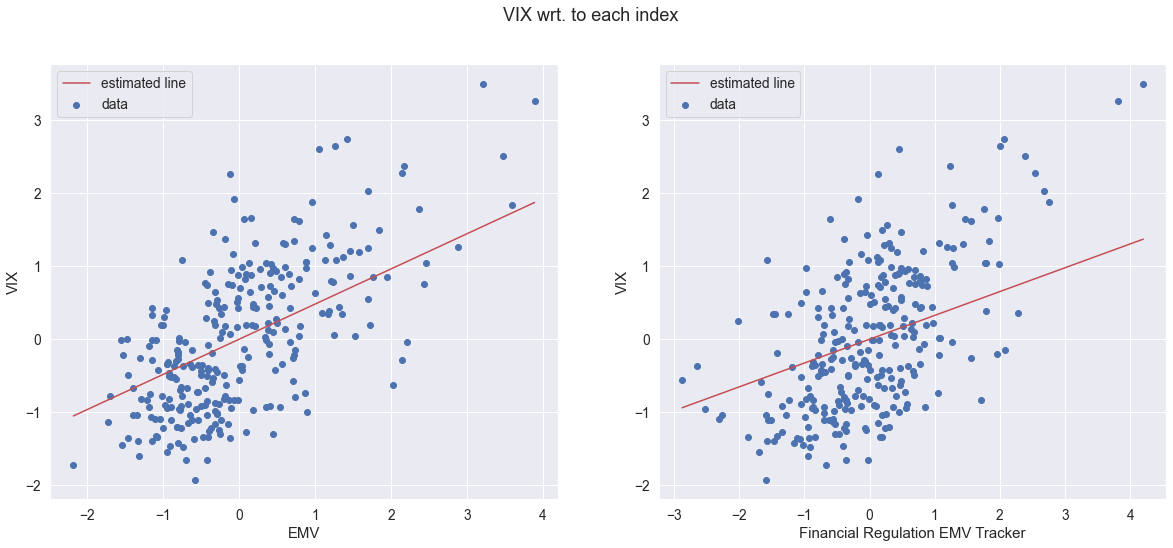

In [134]:
# Appendix 19

### LASSO
In LASSO a new variable was introduced: the alpha (or lambda) value. Here we assume alpha is 0.1; we will tune this in the next section when we evaluate and select the parameters for our model. Same as before, we plot the relation between the three independent variables and VIX after creating the model.

coefficients are [0.41687607 0.26156147] constant is 7.293523303117297e-16 which approaches 0
Index(['EMV', 'Financial Regulation EMV Tracker'], dtype='object')


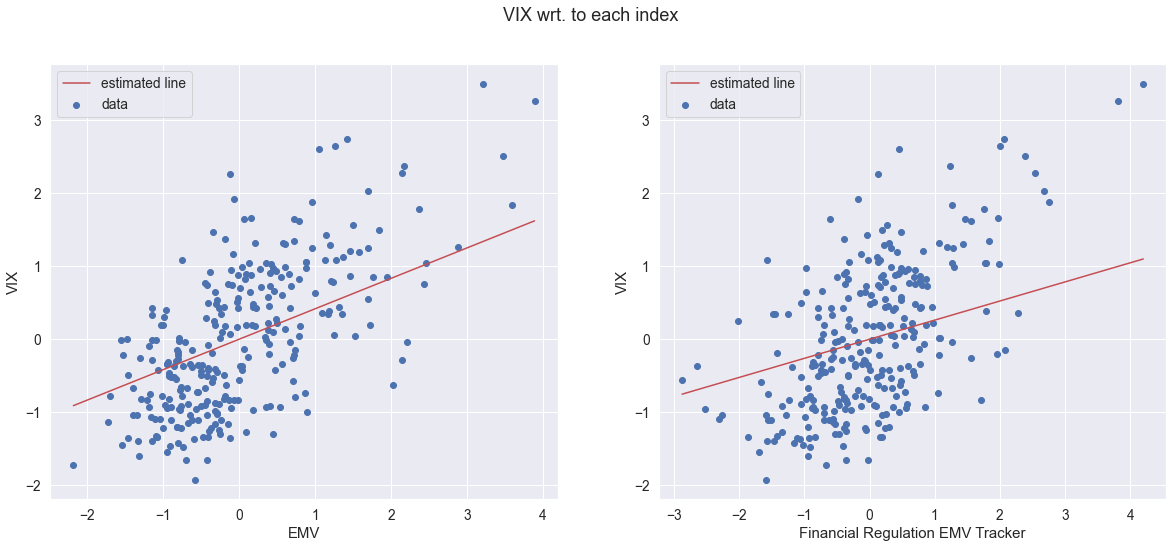

In [137]:
# Appendix 20

One thing to note is that coefficients are generally smaller than that of OLS. Recall the LASSO model:     
![lasso model](./pictures/lasso_formula.jpg)   
We see that in the last term, we penalize large coefficients. Further discussion will be conducted in the model selection section.

### Ridge Regression    
We see that the Ridge Regression model is similar to LASSO:   
![ridge model](./pictures/ridge_formula.png)    
except that we penalize the L2 norm of coefficients. Because of this, we predict the coefficients to be smaller than lasso's coefficients.    
Here we still have the alpha value, and we set this to 0.1 here. It will be tuned in the next section. We create the model and plot the relation between independent variables and VIX.

coefficients are [0.48137435 0.32619921] constant is 6.965713025951575e-16 which approaches 0
Index(['EMV', 'Financial Regulation EMV Tracker'], dtype='object')


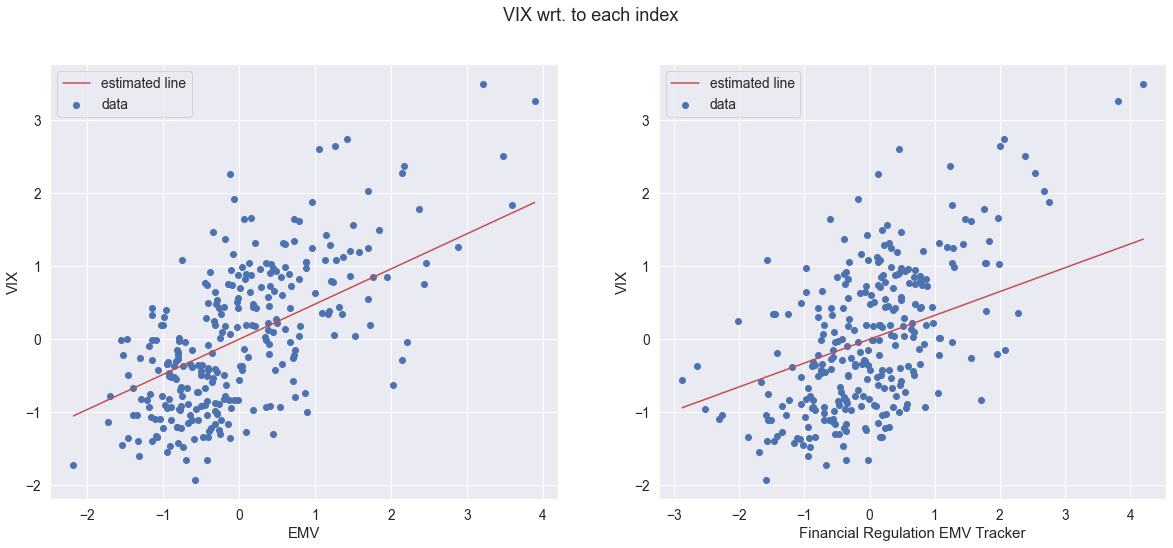

In [139]:
# Appendix 21

Interestingly, the coefficients actually became bigger than that of LASSO. This is because for numbers less than 1, taking the L2 norm results in a smaller number than taking a L1 norm. Hence Ridge regression is taking a weaker penalty on values of coefficients than LASSO in this unusual case.

### Elastic Net
Recall the Elastic net model Sklearn uses.    
![elastic net model](./pictures/enet_formula.jpg)      
It looks a bit different from what were introduced in class, but they're conceptually the same thing.  
We assume alpha = 0.1, and l1_ratio to be 0.8 first. We will tune this in the next section.


coefficients are [0.42198045 0.27332896] constant is 7.248999830721942e-16 which approaches 0
Index(['EMV', 'Financial Regulation EMV Tracker'], dtype='object')


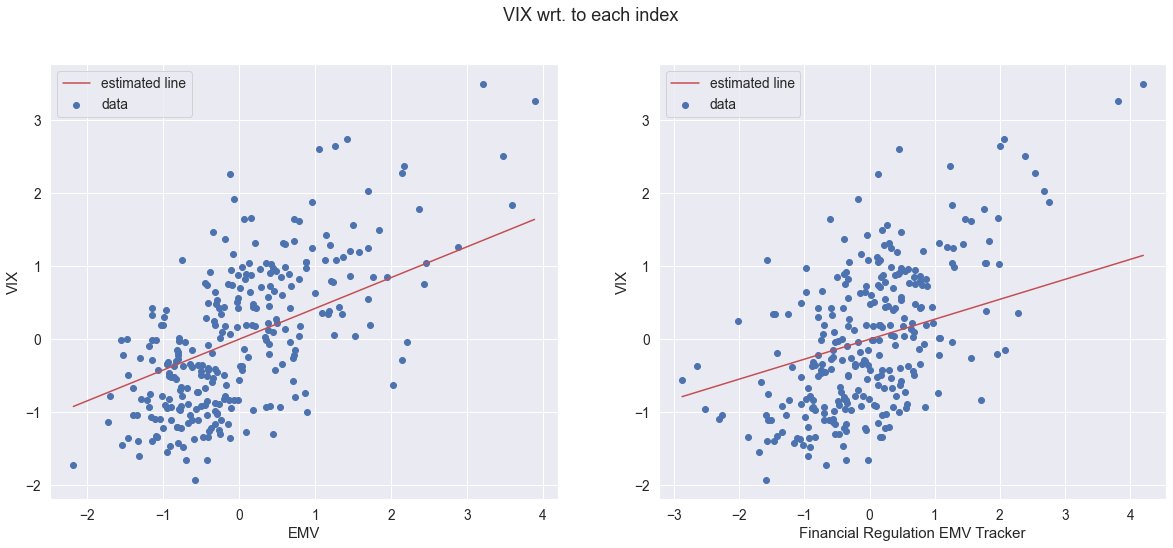

In [141]:
# Appendix 22

Notice that our coefficients are between LASSO and Ridge due to the natural of elastic net -- it's a combinition of the two.   
Now that We've introduced our models, it's time to tune and compare them.

## Fitting and Diagnostics: This part of the report should describe the model fitting and
diagnostics techniques you used, with the goal of identifying a “final” model for forecasting.
Identify also what possible deficiencies your final model has.    

We check how well the models are performing by checking their R-squared value, Adjusted R-Squared value, MAE, RMSE, with an emphasis on RMSE and Adjusted R-Squared
### OLS

In [142]:
# Appendix 23

coefficients are [0.48152802 0.32623006] constant is 6.965275987332686e-16
------------------------------------------------------------
root mean squared error 0.6503752462870611
adjusted r squared: 0.54171496376447
------------------------------------------------------------
mean absolute error (MAE) 0.5284176814238547
r squared value: 0.54496521224841


In OLS we don't need any tuning. 
### LASSO
We show the analysis before tuning when alpha is 0.1.

In [143]:
# Appendix 24

alpha before tuning is 0.1
coefficients are [0.41687607 0.26156147] constant is 7.293523303117297e-16
------------------------------------------------------------
root mean squared error 0.6664425767818589
adjusted r squared: 0.5187916661285306
------------------------------------------------------------
mean absolute error (MAE) 0.5483051773191235
r squared value: 0.5222044911914488


As shown above, if we don't tune alpha and just set it to be 0.1, then our performance is even worse than the simpler OLS model: the Adjusted r-squared value is lower and the RMSE is higher. Before we tune alpha, let's see the relationship between alpha and the coefficients.

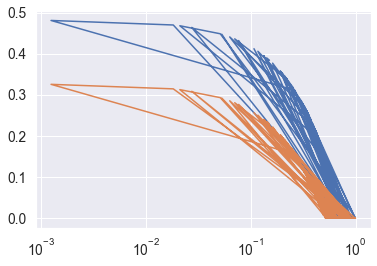

In [144]:
# Appendix 25

We see that the coefficients converge to 0 as alpha increases. This makes sense because as alpha increases, the model penalizes the L1 norm of the coefficients more. Now we tune the alpha by conducting Cross validation using sklearn's LassoCV method. We only search for alphas between 0 and 1 because after expanding the range the ideal alpha is between 0 and 1. Thus for speed and accuracy, I limited the range of alphas to be [0, 1].

In [145]:
# Appendix 26

alpha after tuning is 0.0030585912859596442
coefficients are [0.47956354 0.32424496] constant is 6.975306121830404e-16
------------------------------------------------------------
root mean squared error 0.6506099330297387
adjusted r squared: 0.5413841614216195
------------------------------------------------------------
mean absolute error (MAE) 0.5288066339171341
r squared value: 0.5446367560214661


We see that our performance is way better. As a result, RMSE decreased and adjusted r-squared increased.   

### Ridge Regression
We show the result before tuning when alpha is 0.1

In [146]:
# Appendix 27

alpha before tuning is 0.1
coefficients are [0.48137435 0.32619921] constant is 6.965713025951575e-16 which approaches 0
------------------------------------------------------------
root mean squared error 0.6506099330297387
adjusted r squared: 0.5416926083483844
------------------------------------------------------------
mean absolute error (MAE) 0.5288066339171341
r squared value: 0.5449430153813746


This is actually a pretty good model, the RMSE value and the adjusted r-squared value are pretty close to that of the tuned LASSO model. Now we draw a plot checking the relation between alpha and the coefficients.

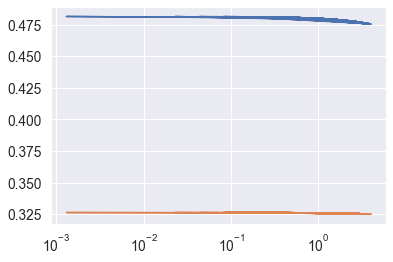

In [147]:
# Appendix 28

We see that they change much more slowly compared to LASSO's coefficients. This shows that the impact of the penalty term isn't as high as LASSO's. (which makes sense, since it takes the L2 norm of numbers less than 1). We now tune alpha using sklearn's RidgeCV.

In [152]:
# Appendix 29

alpha after tuning is 0.0030585912859596442
coefficients are [0.47999809 0.32591921] constant is 6.969637414355457e-16
------------------------------------------------------------
root mean squared error 0.650534836245256
adjusted r squared: 0.5414900269652778
------------------------------------------------------------
mean absolute error (MAE) 0.5287121228786188
r squared value: 0.5447418707456659


Unexpectedly, this model still performs worse than OLS. But still, it performs much better after tuning.
Notice that setting a penalty to the coefficients means penaltizing more features. In our case, we don't see a big change in the coefficients since we've chose our independent variables well (we exclude a lot features that are multicollinear). But if we choose other features that are collinear with each other, then we will see a bigger improvement in LASSO and Ridge. 

### Elastic Net
Analyze before tuning

In [149]:
# Appendix 30

alpha before tuning is 0.1 , L1_ratio is 0.8
coefficients are [0.42198045 0.27332896] constant is 7.248999830721942e-16 which approaches 0
------------------------------------------------------------
root mean squared error 0.6505343319424549
adjusted r squared: 0.5228775384270532
------------------------------------------------------------
mean absolute error (MAE) 0.5287112030139687
r squared value: 0.5262613856722513


we see that it doesn't perform good. This is because there are two parameters to tune (alpha and L1_ratio), letting it harder to guess the correct value. We obtain the optimized value using Cross validation.

In [150]:
# Appendix 31

alpha after tuning is 0.008742858535401132 , L1_ratio is 0.0024933515613970725
coefficients are [0.47777292 0.3254327 ] constant is 6.976076852122573e-16
------------------------------------------------------------
root mean squared error 0.6509258019230327
adjusted r squared: 0.5228775384270532
------------------------------------------------------------
mean absolute error (MAE) 0.5293372700103696
r squared value: 0.5262613856722513


Although the RMSE decrease and adjusted r-squared increased after tuning, we still obtain a result worse than the ridge regression model. In addition, we obtain that the L1_ratio value is really small, meaning that our model favors L2 penalty over L1. This suggests that ridge regression is a better model in this case.

### summary
The following is a table of the performance of our (tuned) models.   
![Summary table](./pictures/summary_table_3.jpg)      
      
Supprisingly, OLS is our top choice. It has the smallest RMSE, the highest Adjusted R2 value, the smallest MAE, and the highest R2 value, which makes it our final decision for predicting VIX. I believe this is the case because of the high quality of the independent variables: they are informative and there are only two of them. If I were to dump a lot of different features with multicollinearity, the other three models will do better. Also, for the same reason, this is why the difference between Adj-R2 and R2 is really small: there are only two independent variables.     
However, if we were to expand the dataset, it is most likely that we would switch our model, since it would be too complex for OLS to handle.

## Underlying Mechanisms of Sudden Changes in VIX
We've discussed the regime changing phenomenom when introducing the VIX dataset. Now that we have the EMV dataset, we have are able to conduct analysis. First, we want to know where does regime actually change. We plot the VIX-time graph to find out.

<AxesSubplot:xlabel='Date'>

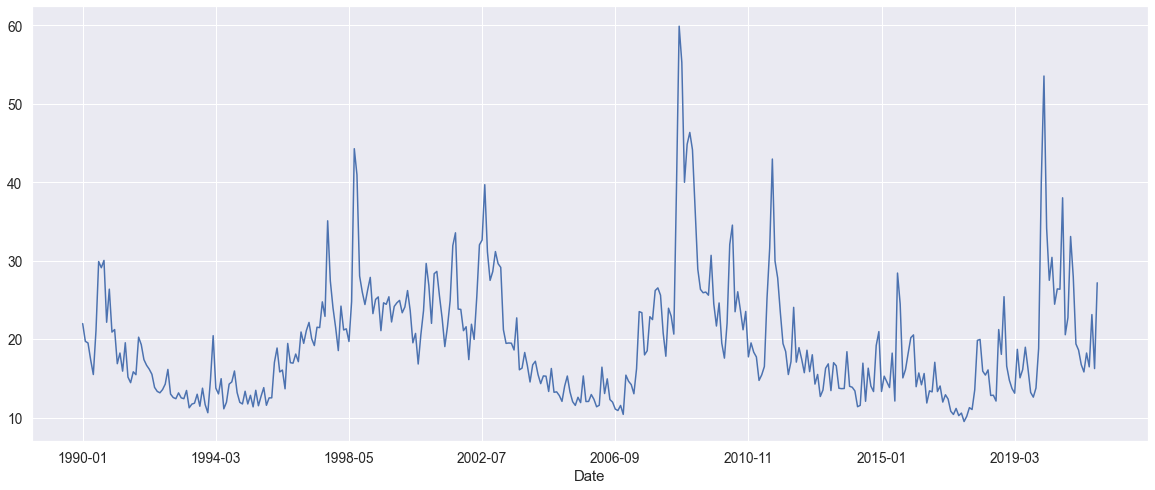

In [155]:
# Appendix 32

We could eyeball that this graph could be divided into roughly 6 parts, and each part could be categorized into stable or unstable.  
The stable dates are:
- start to 1997-01,
- 2003-01 to 2006-12,
- 2012-06 to 2019-07
The unstable dates are:
- 1997-01 to 2003-01,
- 2006-12 to 2012-06,
- 2019-07 to end
We Divde the dataframe into these 6 parts, concat them to form a stable and unstable dataframes, and check which independent variables correlates to VIX the most in these two categories.

length of stable is 216 which is 56 percent
Index(['VIX', 'National Security Policy EMV Tracker ',
       'Commodity Markets EMV Tracker', 'Petroleum Markets EMV Tracker',
       'Macro – Real Estate Markets EMV Tracker', 'EMV',
       'Financial Regulation EMV Tracker',
       'Macroeconomic News and Outlook EMV Tracker',
       'Political Uncertainty Tracker',
       'Macro – Broad Quantity Indicators EMV Tracker'],
      dtype='object')


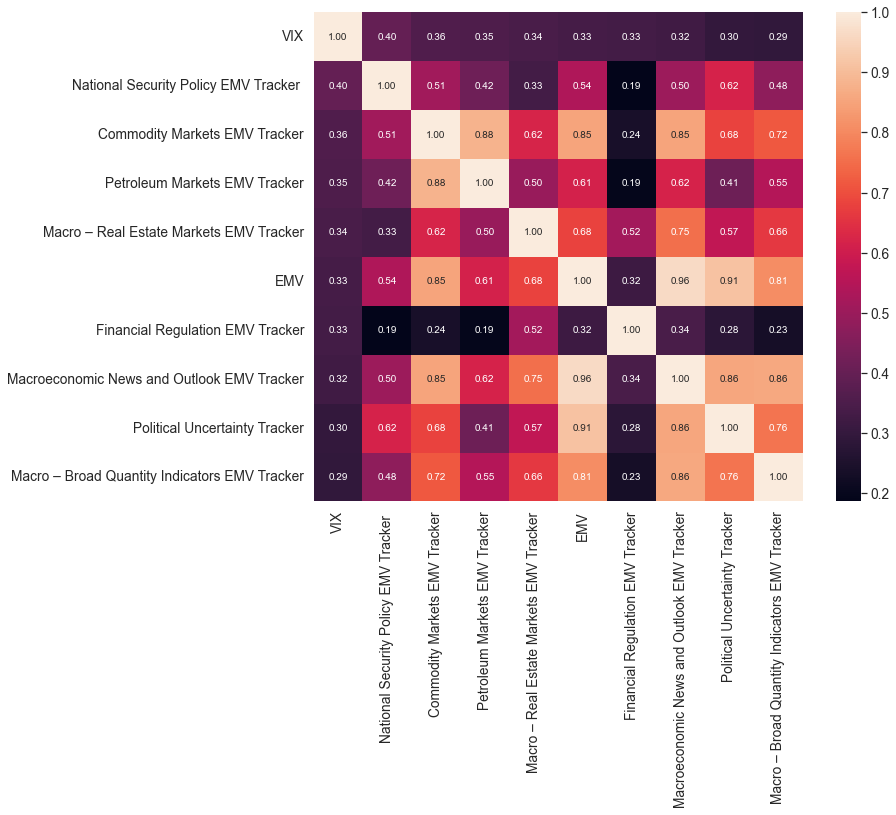

In [162]:
# Appendix 33

We found out that the top 5 features with the most correlation to VIX are:
- 'National Security Policy EMV Tracker '
- 'Commodity Markets EMV Tracker'
- 'Petroleum Markets EMV Tracker'
- 'Macro – Real Estate Markets EMV Tracker'
- 'EMV'
Which is suprising, since the the points in the stable category is 56% percent of the whole data, out of the top 5 features of the whole dataframe, we only see EMV and 'Commodity Markets EMV Tracker' still here. 'Political Uncertainty Tracker', 'Macroeconomic News and Outlook EMV Tracker', and other features in the top 5 of the whole datafram aren't in the top 5 of this chart.
Now lets check the correlation matrix (or heatmap) of the unstable category.

Index(['VIX', 'Financial Regulation EMV Tracker', 'EMV',
       'Macroeconomic News and Outlook EMV Tracker',
       'Political Uncertainty Tracker', 'Regulation EMV Tracker',
       'Commodity Markets EMV Tracker',
       'Macro – Broad Quantity Indicators EMV Tracker',
       'Financial Crises EMV Tracker', 'Fiscal Policy EMV Tracker'],
      dtype='object')


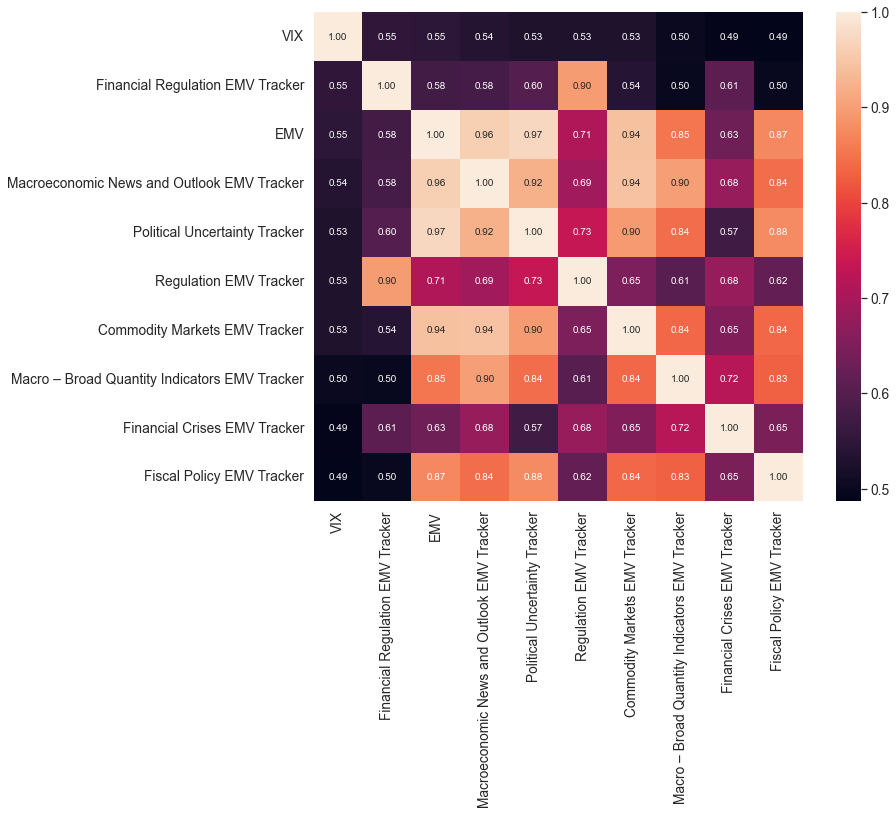

In [163]:
# Appendix 34

The top 5 features that has the highest correlation with VIX are:
- 'Financial Regulation EMV Tracker'
- 'EMV',
- 'Macroeconomic News and Outlook EMV Tracker',
- 'Political Uncertainty Tracker'
- 'Regulation EMV Tracker'
Most of which could be seen in the top five of the whole dataframe.

### Conclusion
There are different underlying drivering factors for different states (stable and unstable), both listed above.

## Discussion
### Summary
For the first part, we discussed how we could categorize the regimes (states of VIX).     
First, we load the file, calculated the monthly log-returns of VIX, and found a Gaussian Mixture Distribution to describe it with the correct parameters for different assumptions of different regime numbers. Second, we decide the correct number of regimes by comparing the objective values and conducting chi-squared test and checking their p-value. Third, we found the mcp at each observation and computed a 3 by 3 probability transition matrix M, where each element M_ij represents the probability of regime i switching to regime j, and gave some guesses about the driving factors behind regime switching phenomenon.       
For the second part, we proposed four models to predict VIX one step ahead. First, we conducted data preprocessing, which includes feature choosing, treatment of outliers, transformation, and standardization. Next, we implemented the four models, which are OLS, LASSO, Ridge regression, and Elastic Net.
For the third part, we evaluated the four models using RMSE, MAE, R-squared, Adjusted R-squared, and tuned the parameters using cross validation. In the end, OLS performed the best because we only have two features, and that the features have relatively low multicollinearity.   
For the fourth part, we divided the whole dataframe into two categories -- stable and unstable -- and checked the underlying features that effect VIX. In the end, we discovered that the driving features for these two categories are quite different.

### Shortcomings
First, the data is very limited. The specific categories of EMV might correlate to VIX, but it's impossible to predict VIX correctly. Also, there are only 360 entries for each feature, which isn't that enough for predicting VIX. In the end, we achieved an Adjusted R-squared value of 0.54171, which, on the bright side, is greater than 0.5.     
Secondly, the model we chose is too simple. Yes, it performed the best among the four models, thus it's the most logical to use that. However, if we add new data or new features in the future, then OLS might not be the best choice due to the complexity of the new data, or the multicollinearity of the new features. 

### Interesting notes
Something worth noting is that at first, I thought we weren't allowed to use the general "EMV" value to predict VIX. In this case, I used three features, and the result is that Ridge regression is the best choice. The reason behind that is that we have more data but they're more multicollinear. Since we have more parameters to consider, OLS isn't working that well. Ridge regression, on the other hand, gives a soft penalty on the parameters (since the coefficients are less than 1, L2 gives a weaker penalty than L1). This allows the model to be more insensitive, letting it perform better.

## Bibliography
[1] Kuepper, J 2021, Cboe Volatility Index (VIX), Investopia, accessed 16 December 2021, <https://www.investopedia.com/terms/v/vix.asp>             
[2] Summa, J 2020, Determining Market Direction With VIX, Investopia, accessed 16 December 2021, <https://www.investopedia.com/articles/optioninvestor/03/091003.asp>     
[3] Considine, G 2018, The Limits Of VIX As An Indicator, Seeking Alpha, accessed 16 December 2021, <https://seekingalpha.com/article/4144754-limits-of-vix-indicator>     
[4] Bai, Yunfei and Cai, Charlie Xiaowu, Predicting VIX with Adaptive Machine Learning (June 14, 2021). Available at SSRN: https://ssrn.com/abstract=3866415 or http://dx.doi.org/10.2139/ssrn.3866415     
[5] Ataei, Masoud, Introduction to Machine Learning and Data Mining CSCC11H3 Take-home Final Exam.     
[6] Chi-Square Test Calculator. (2018, November 13). Retrieved from https://www.socscistatistics.com/tests/chisquare2/default2.aspx.       
[7] Seabold, Skipper, and Josef Perktold. “statsmodels: Econometric and statistical modeling with python.” Proceedings of the 9th Python in Science Conference. 2010.
[8] Osborne, Jason W. and Waters, Elaine (2002) "Four assumptions of multiple regression that researchers
should always test," Practical Assessment, Research, and Evaluation: Vol. 8 , Article 2.
DOI: https://doi.org/10.7275/r222-hv23
Available at: https://scholarworks.umass.edu/pare/vol8/iss1/2

## Appendices:
##### Appendix 1:

[Text(0.5, 0, 'VIX'), Text(0, 0.5, 'Number of Occurrences')]

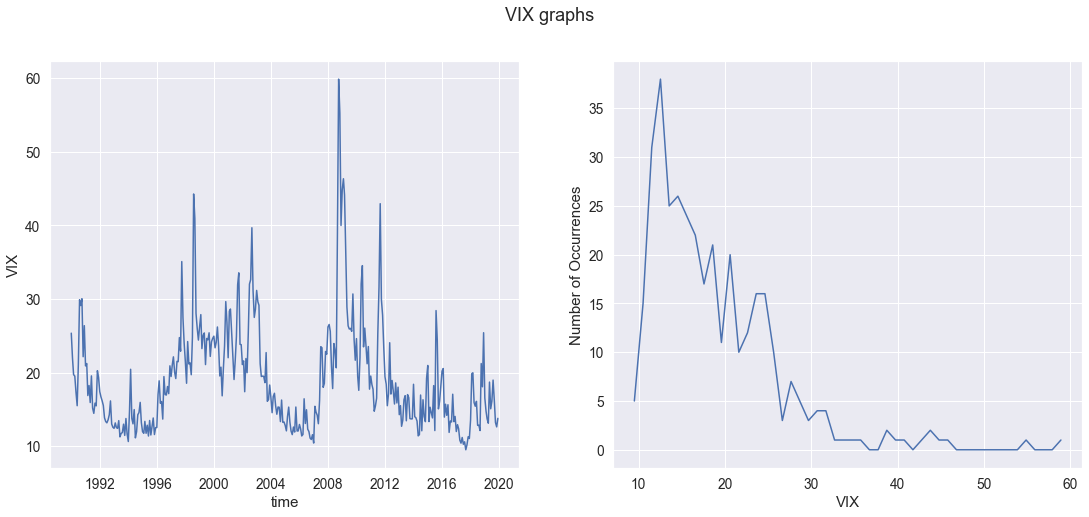

In [ ]:
# left: history of VIX, right: what we want our model to estimate
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import _pickle as pickle
import genetic_algorithm
import math

with open("./q1/MVIX.pkl", "rb") as f:
  df = pd.read_pickle(f)
d = df.to_dict().get('Adj Close')
# pd.Period(d.keys()).to_timestamp()
data = []
for i in d.keys():
  data.append(d.get(i))
M = 50
bins = np.linspace(min(data), max(data) + 0.01, M + 1)
digitized = np.digitize(data, bins)
bin_count = np.bincount(digitized)[1:]

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18.5, 7.5)
fig.set
fig.suptitle('VIX graphs')
ax1.plot([t.to_timestamp() for t in d.keys()], data)
ax1.set(xlabel='time', ylabel='VIX')
ax2.plot(bins[:-1], bin_count)
ax2.set(xlabel='VIX', ylabel='Number of Occurrences')

##### Appendix 2:

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import _pickle as pickle
import genetic_algorithm
import math

def p_hat(j, M, N, bin_count):
  assert 0 <= j and j < M, f"index out of bounds for p_hat({j})"
  return bin_count[j] / N

def normal_cdf(x, mu, sigma):
  assert sigma > 0, f"mu <= 0 in normal cdf"
  total = 0.5 * (1 + (math.erf( (x - mu) / (np.sqrt(2)*sigma) )))
  assert not math.isnan(total) and not math.isinf(total), "total is {total} in normal cdf"
  return total

def p(j, k, theta, bins):
  total = 0
  for i in range(k):
    a = normal_cdf(bins[j], theta[i*3 + 0], theta[i*3 + 1])
    b = normal_cdf(bins[j + 1], theta[i*3 + 0], theta[i*3 + 1])
    assert a <= b, f"cdf wrong, mu: {theta[i*3 + 0]}, sigma: {theta[i*3 + 1]}, bins[j]: {bins[j]}, a:{a}, bins[j+1]: {bins[j+1]}, b:{b}"
    total += theta[i*3 + 2] * (b - a)
  assert not math.isnan(total) and not math.isinf(total), "total is {total} in p"
  return total

def loss(M, N, k, theta, bins, bin_count):
  total = 0
  for j in range(M):
    phat = p_hat(j, M, N, bin_count)
    if phat == 0:
      phat = 0.0000001
    p_over_phat = p(j, k, theta, bins) / phat
    if (p_over_phat == 0):
      p_over_phat = 0.0000001
    total += phat * np.log(p_over_phat)
    # if math.isnan(total) or math.isinf(total):
    #   print(M, N, k, theta, bins, bin_count, p_hat(j, M, N, bin_count) * (np.log(p(j, k, theta, bins) / p_hat(j, M, N, bin_count))))
  # print("total", total)
  # assert not math.isnan(total) and not math.isinf(total), f"total is {total} in loss"
  return -2 * N * total

def loss_for_k_1(theta):
  #setting up file and constants
  with open("MVIX.pkl", "rb") as f:
   df = pd.read_pickle(f)
  d = df.to_dict().get('Adj Close')

  dat = []
  for i in d.keys():
    dat.append(d.get(i))
  # print(max(data), min(data))

  data = []
  for i in range(len(dat) - 1):
    data.append(np.log(dat[i+1] / dat[i]))

  M = 50
  k = 1
  N = len(data)

  new_theta = [0, 0, 0]
  
  new_theta[0] = theta[0]
  new_theta[1] = theta[1]
  new_theta[2] = 1

  bins = np.linspace(min(data), max(data) + 0.01, M + 1)
  digitized = np.digitize(data, bins)
  bin_count = np.bincount(digitized)[1:]

  return loss(M, N, k, new_theta, bins, bin_count)

def loss_for_k_2(theta):
  #setting up file and constants
  with open("MVIX.pkl", "rb") as f:
   df = pd.read_pickle(f)
  d = df.to_dict().get('Adj Close')

  dat = []
  for i in d.keys():
    dat.append(d.get(i))
  # print(max(data), min(data))

  data = []
  for i in range(len(dat) - 1):
    data.append(np.log(dat[i+1] / dat[i]))

  M = 50
  k = 2
  N = len(data)



  bins = np.linspace(min(data), max(data) + 0.01, M + 1)
  digitized = np.digitize(data, bins)
  bin_count = np.bincount(digitized)[1:]
  # bins /= max(bins)
  new_theta = [0, 0, 0, 0, 0, 0]
  pi = [theta[4]]
  pi = [pi[0], 1 - pi[0]]
  for i in range(k):
    new_theta[i * 3] = theta[i * 2]
    new_theta[i * 3 + 1] = theta[i * 2 + 1]
    new_theta[i * 3 + 2] = pi[i]

  return loss(M, N, k, new_theta, bins, bin_count)

def loss_for_k_3(theta):
  #setting up file and constants
  with open("MVIX.pkl", "rb") as f:
   df = pd.read_pickle(f)
  d = df.to_dict().get('Adj Close')

  dat = []
  for i in d.keys():
    dat.append(d.get(i))
  # print(max(data), min(data))

  data = []
  for i in range(len(dat) - 1):
    data.append(np.log(dat[i+1] / dat[i]))

  M = 50
  k = 3
  N = len(data)



  bins = np.linspace(min(data), max(data) + 0.01, M + 1)
  digitized = np.digitize(data, bins)
  bin_count = np.bincount(digitized)[1:]
  # bins /= max(bins)
  new_theta = [0, 0, 0, 0, 0, 0, 0, 0, 0]
  pi = [theta[6], theta[7]]
  pi.sort()
  pi = [pi[0], pi[1] - pi[0], 1 - pi[1]]

  for i in range(3):
    new_theta[i * 3] = theta[i * 2]
    new_theta[i * 3 + 1] = theta[i * 2 + 1]
    new_theta[i * 3 + 2] = pi[i]
  
  # print(new_theta)
  return loss(M, N, k, new_theta, bins, bin_count)

def loss_for_k_4(theta):
  #setting up file and constants
  with open("MVIX.pkl", "rb") as f:
   df = pd.read_pickle(f)
  d = df.to_dict().get('Adj Close')

  dat = []
  for i in d.keys():
    dat.append(d.get(i))
  # print(max(data), min(data))

  data = []
  for i in range(len(dat) - 1):
    data.append(np.log(dat[i+1] / dat[i]))

  M = 50
  k = 4
  N = len(data)



  bins = np.linspace(min(data), max(data) + 0.01, M + 1)
  digitized = np.digitize(data, bins)
  bin_count = np.bincount(digitized)[1:]
  # bins /= max(bins)
  new_theta = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  pi = [theta[8], theta[9], theta[10]]
  pi.sort()
  pi = [pi[0], pi[1] - pi[0], pi[2] - pi[1], 1 - pi[2]]

  for i in range(4):
    new_theta[i * 3] = theta[i * 2]
    new_theta[i * 3 + 1] = theta[i * 2 + 1]
    new_theta[i * 3 + 2] = pi[i]
  
  # print(new_theta)
  return loss(M, N, k, new_theta, bins, bin_count)

def loss_for_k_5(theta):
  #setting up file and constants
  with open("MVIX.pkl", "rb") as f:
   df = pd.read_pickle(f)
  d = df.to_dict().get('Adj Close')

  dat = []
  for i in d.keys():
    dat.append(d.get(i))
  # print(max(data), min(data))

  data = []
  for i in range(len(dat) - 1):
    data.append(np.log(dat[i+1] / dat[i]))

  M = 50
  k = 5
  N = len(data)



  bins = np.linspace(min(data), max(data) + 0.01, M + 1)
  digitized = np.digitize(data, bins)
  bin_count = np.bincount(digitized)[1:]
  # bins /= max(bins)
  new_theta = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  pi = [theta[10], theta[11], theta[12], theta[13]]
  pi.sort()
  pi = [pi[0], pi[1] - pi[0], pi[2] - pi[1], pi[3] - pi[2], 1-pi[3]]

  for i in range(k):
    new_theta[i * 3] = theta[i * 2]
    new_theta[i * 3 + 1] = theta[i * 2 + 1]
    new_theta[i * 3 + 2] = pi[i]
  
  # print(new_theta)
  return loss(M, N, k, new_theta, bins, bin_count)


"""
Params:
function - one of "loos_for_k_1", "loos_for_k_2", "loos_for_k_3", "loos_for_k_4", "loos_for_k_5"
dimension - one of 2, 5, 8, 11, 14

Note:
The bounds were chosen to be +-3 since the estimated numbers stayed in [-1, 1] 
most of the time even whne we set the interval to be [-50, 50]. Hence we set the bounds
to be much smaller for precision and effeciency.
"""
ga = genetic_algorithm.GeneticAlgorithm(
  function=loss_for_k_1, \
  dimension=2, \
  variable_type='real', \
  variable_boundaries=np.array([[-3, 3], [0.0000001, 3]]))  
  
ga.run()

ga = genetic_algorithm.GeneticAlgorithm(
  function=loss_for_k_2, \
  dimension=5, \
  variable_type='real', \
  variable_boundaries=np.array([[-3, 3], [0.0000001, 3], [-3, 3], [0.0000001, 3], [0, 1]]))
ga.run()

ga = genetic_algorithm.GeneticAlgorithm(
  function=loss_for_k_3, \
  dimension=8, \
  variable_type='real', \
  variable_boundaries=np.array([[-3, 3], [0.00001, 3], [-3, 3], [0.0000001, 3], [-3, 3], [0.0000001, 3], [0, 1], [0, 1]]))
ga.run()

ga = genetic_algorithm.GeneticAlgorithm(
  function=loss_for_k_4, \
  dimension=11, \
  variable_type='real', \
  variable_boundaries=np.array([[-3, 3], [0.00001, 3], [-3, 3], [0.0000001, 3], [-3, 3], [0.0000001, 3], [-3, 3], [0.0000001, 3], [0, 1], [0, 1], [0, 1]]))
ga.run()

ga = genetic_algorithm.GeneticAlgorithm(
  function=loss_for_k_5, \
  dimension=14, \
  variable_type='real', \
  variable_boundaries=np.array([[-3, 3], [0.00001, 3], [-3, 3], [0.0000001, 3], [-3, 3], [0.0000001, 3], [-3, 3], [0.0000001, 3], [-3, 3], [0.0000001, 3], [0, 1], [0, 1], [0, 1], [0, 1]]))
ga.run()




##### Appendix 3:
The problem could be modified as follows: given several numbers with range [0, 1], want to find k different numbers that sum up to 1. The answer is trivial in the k=1 case (answer will always be one), but how about cases when k > 1?   
The method we use here is rather simple yet efficient. First, we take k - 1 numbers with range [0, 1]. Then, we sort them from smallest to largest. Now imagine we have a line with length one, and we cut the line where the k - 1 numbers occur. For example, if k = 3, and the 2 numbers with range [0, 1] are 0.34 and 0.56, then we have 3 numbers that sum up to 1 now: 0.34, (0.56 - 0.34), and (1 - 0.56). This method allows us to obtain k numbers in [0, 1] that sum up to 1 given (k - 1) numbers within range [0, 1], which is useful for the genetic algorithm.

##### Appendix 4: 
For arbritary k = 1, 2, 3, 4, 5, the parameters for "loss_for_k_<num>" is a 1D list with length (3\*k - 1). The first 2\*k elements represent (μ1, σ1)...(μk, σk). The Last k-1 elements represent the k-1 numbers in range[0, 1] as mentioned in Appendix 3.

##### Appendix 5:
- k=1: top left
- k=2: top right
- k=3: middle left
- k=4: middle right    
- k=5: bottom left       
![p-values](./pictures/p-val.jpg)

##### Appendix 6:

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import _pickle as pickle
import genetic_algorithm
import math


def normal_pdf(x, mu, sigma):
  assert sigma > 0, f"sigma <= 0 in normal_pdf"
  return np.exp(-1 * ((x - mu)**2) / (2 * (sigma**2))) / (sigma * np.sqrt(2 * np.pi))

def ff(x, theta):
  K, D = np.shape(theta)
  assert D == 3, f"theta has incorrect shape {D}"
  total = 0
  for i in range(K):
    total += theta[i][2] * normal_pdf(x, theta[i][0], theta[i][1])
  return total

def P(x, i,  theta):
  K, D = np.shape(theta)
  assert D == 3, f"theta has incorrect shape {D}"
  assert i < K, f"{i}th cluster exceeds {K} clusters"
  return ff(x, [theta[i]]) / ff(x, theta)

def mcp_argmax(x, theta):
  K, D = np.shape(theta)
  assert D == 3, f"theta has incorrect shape {D}"
  return np.argmax([P(x, i, theta) for i in range(K)])

def mcp(x, theta):
  K, D = np.shape(theta)
  assert D == 3, f"theta has incorrect shape {D}"
  return np.max([P(x, i, theta) for i in range(K)])

def mcp_list(x, theta):
  K, D = np.shape(theta)
  assert D == 3, f"theta has incorrect shape {D}"
  return [P(x, i, theta) for i in range(K)]

# theta_4 = np.array([[20.73, 4.8, 0.56], [37.95, 10.00, 0.06],  [12.09, 0.86, 0.13],  [14.47, 1.98, 0.25]])
theta_3 = np.array([[0.02754508, 0.20759429, 0.48590625], [-0.04126812, 0.12435516, 0.48841411], [0.23583547, 0.33608112, 0.02567964]])

K, D = np.shape(theta_3)

with open("MVIX.pkl", "rb") as f:
  df = pd.read_pickle(f)
d = df.to_dict().get('Adj Close')

dat = []
for i in d.keys():
  dat.append(d.get(i))
# print(max(data), min(data))

data = []
for i in range(len(dat) - 1):
  data.append(np.log(dat[i+1] / dat[i]))



list_of_mcps = []
for d in data:
  list_of_mcps.append((mcp_argmax(d, theta_3), mcp(d, theta_3)))
  print((mcp_argmax(d, theta_3), mcp(d, theta_3)))

mcp_matrix = []
for d in data:
  mcp_matrix.append(mcp_list(d, theta_3))


# print(mcp_matrix)

count_matrix = np.zeros(shape=(K, K))
prob_trans_matrix = np.zeros(shape=(K, K))
N = len(data)
for i in range(N):
  current_regime = np.argmax(mcp_matrix[i])
  for j in range(K):
    count_matrix[current_regime][j] += 1
    prob_trans_matrix[current_regime][j] += mcp_matrix[i][j]



for i in range(K):
  for j in range(K):
    prob_trans_matrix[i][j] /= count_matrix[i][j]
    print(prob_trans_matrix[i][j], end=" ")
  print("")

# print(list_of_mcps)
print(prob_trans_matrix)


### Appendix 7 ~ 34:

In [ ]:
# Appendix 7
# the preprocessing process is inspired by 
# https://towardsdatascience.com/data-preparation-and-preprocessing-is-just-as-important-creating-the-actual-model-in-data-sciences-2c0562b65f62

import matplotlib.pyplot as plt 
import numpy as np
import _pickle as pickle
import seaborn as sns
from sklearn.model_selection import train_test_split

with open("./q2/MEMV.pkl", "rb") as f:
  df = pickle.load(f)

corr_matrix = df.corr()
plt.subplots(figsize=(12,9))

k = 15 #number of variables for heatmap
cols = corr_matrix.nlargest(k, 'VIX')['VIX'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': k}, yticklabels=cols.values, xticklabels=cols.values)
vix_df = df['VIX']

In [ ]:
# Appendix 8
for key in df.keys():
  if key == 'EMV' or key == 'Financial Regulation EMV Tracker' or key =='VIX':
    continue
  df.drop(key, inplace=True, axis=1)
X_train, X_test, y_train, y_test = train_test_split(df, vix_df, test_size=0.25, random_state=123)



In [ ]:
# Appendix 9
X_train.plot(x='EMV', y='VIX', style='o')
X_train.plot(x='Financial Regulation EMV Tracker', y='VIX', style='o')

In [ ]:
# Appendix 10
X_train = X_train.drop(X_train[(X_train['VIX'] > 40) & (X_train['EMV'] < 25)].index)
X_train = X_train.drop(X_train[(X_train['VIX'] > 35) & (X_train['Financial Regulation EMV Tracker'] < 2)].index)

X_train.plot(x='EMV', y='VIX', style='o')
X_train.plot(x='Financial Regulation EMV Tracker', y='VIX', style='o')


In [ ]:
# Appendix 11
from scipy import stats
from scipy.stats import norm
sns.distplot(X_train['VIX'], fit=norm).set_title("Distribution of VIX")

# probability plot
fig = plt.figure()
res = stats.probplot(X_train['VIX'], plot=plt)

In [ ]:
# Appendix 12
sns.distplot(X_train['Financial Regulation EMV Tracker'], fit=norm).set_title("Distribution of 'Financial Regulation EMV Tracker'")

# probability plot
fig = plt.figure()
res = stats.probplot(X_train['Financial Regulation EMV Tracker'], plot=plt)

In [ ]:
# Appendix 13
sns.distplot(X_train['EMV'], fit=norm).set_title("Distribution of 'EMV'")

# probability plot
fig = plt.figure()
res = stats.probplot(X_train['EMV'], plot=plt)

In [ ]:
# Appendix 14
#Using the log1p function applies log(1+x) to all elements of the column
X_train['VIX'] = np.log10(X_train['VIX'])
X_test['VIX'] = np.log10(X_test['VIX'])
X_train['Financial Regulation EMV Tracker'] = np.log(X_train['Financial Regulation EMV Tracker'])
X_test['Financial Regulation EMV Tracker'] = np.log(X_test['Financial Regulation EMV Tracker'])
X_train['EMV'] = np.log10(X_train['EMV'])
X_test['EMV'] = np.log10(X_test['EMV'])

#Check the new distribution after log transformation 
sns.distplot(X_train['VIX'] , fit=norm)


# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(X_train['VIX'])
print( '-------------------------\n mean =', mu, 'sd = ', sigma)

#NPlotting the distribution
plt.ylabel('Frequency')
plt.title('Distribution of Log VIX')

#Also the QQ plot
fig = plt.figure()
res = stats.probplot(X_train['VIX'], plot=plt)
plt.show()

In [ ]:
# Appendix 15
sns.distplot(X_train['Financial Regulation EMV Tracker'] , fit=norm)
#NPlotting the distribution
plt.ylabel('Frequency')
plt.title('Distribution of Log Financial Regulation EMV Tracker')

#Also the QQ plot
fig = plt.figure()
res = stats.probplot(X_train['Financial Regulation EMV Tracker'], plot=plt)
plt.show()


In [ ]:
# Appendix 16
sns.distplot(X_train['EMV'] , fit=norm)
#NPlotting the distribution
plt.ylabel('Frequency')
plt.title("Distribution of Log 'EMV'")

#Also the QQ plot
fig = plt.figure()
res = stats.probplot(X_train['EMV'], plot=plt)
plt.show()

In [ ]:
# Appendix 17
mean = X_train.mean()
std = np.sqrt(X_train.var())
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

y_train = X_train['VIX']
X_train.drop('VIX', inplace=True, axis=1)
y_test = X_test['VIX']
X_test.drop('VIX', inplace=True, axis=1)

X_train.plot(figsize=(20, 8))
print("mean\n", X_train.mean())
print("-------------------------------")
print("variance\n", X_train.var())
print("-------------------------------\nplot of X_train")



In [ ]:
# Appendix 18
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler

# plot 2 things:
#   1. the curve corresponding to beta_hat
#   2. the points with x = x_points[j][0], y = y_points[j][0], for all j.
def visualize(beta_hat, x_src, y_src,ax=plt, point_label="data", line_label="estimated line", x_label="x", y_label="y"):
  graph_x = np.linspace(np.min(x_src), np.max(x_src), 100)
  coeff = [i for i in beta_hat]
  coeff = coeff[::-1]
  graph_y = np.polyval(coeff, graph_x)
  ax.plot(graph_x, graph_y, '-r', label=line_label)
  ax.scatter(x_src, y_src, label=point_label)
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)
  ax.legend(loc='best')
  # ax.show

In [ ]:
# Appendix 19
ols = LinearRegression().fit(X_train,y_train)
print("--------------------------\ncoefficients are", ols.coef_, "constant is", ols.intercept_, "which approaches 0", "\n--------------------------")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('VIX wrt. to each index')
print(X_train.keys())
visualize([0, 0.48152802], X_train['EMV'], y_train, ax = ax1, x_label = 'EMV', y_label='VIX')
visualize([0, 0.32623006], X_train['Financial Regulation EMV Tracker'], y_train, ax = ax2,x_label = 'Financial Regulation EMV Tracker', y_label='VIX')

In [ ]:
# Appendix 20
lasso = Lasso().set_params(alpha = 0.1).fit(X_train,y_train)
print("coefficients are", lasso.coef_, "constant is", lasso.intercept_, "which approaches 0")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('VIX wrt. to each index')
print(X_train.keys())
visualize([0, 0.41687607], X_train['EMV'], y_train, ax = ax1, x_label = 'EMV', y_label='VIX')
visualize([0, 0.26156147], X_train['Financial Regulation EMV Tracker'], y_train, ax = ax2,x_label = 'Financial Regulation EMV Tracker', y_label='VIX')

In [ ]:
# Appendix 21
ridge = Ridge(alpha = 0.1).fit(X_train, y_train)
print("coefficients are", ridge.coef_, "constant is", ridge.intercept_, "which approaches 0")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('VIX wrt. to each index')
print(X_train.keys())
visualize([0, 0.48137435], X_train['EMV'], y_train, ax = ax1, x_label = 'EMV', y_label='VIX')
visualize([0, 0.32619921], X_train['Financial Regulation EMV Tracker'], y_train, ax = ax2,x_label = 'Financial Regulation EMV Tracker', y_label='VIX')

In [ ]:
# Appendix 22
enet = ElasticNet(alpha=0.1, l1_ratio= 0.8).fit(X_train, y_train)
print("coefficients are", enet.coef_, "constant is", enet.intercept_, "which approaches 0")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('VIX wrt. to each index')
print(X_train.keys())
visualize([0, 0.42198045], X_train['EMV'], y_train, ax = ax1, x_label = 'EMV', y_label='VIX')
visualize([0, 0.27332896], X_train['Financial Regulation EMV Tracker'], y_train, ax = ax2,x_label = 'Financial Regulation EMV Tracker', y_label='VIX')

In [ ]:
# Appendix 23
n = len(X_train['Financial Regulation EMV Tracker'])
p = len(X_train.keys())
ols = LinearRegression().fit(X_train,y_train)
y_pred = ols.predict(X_test)
R2 = r2_score(y_test, y_pred)
print("coefficients are", ols.coef_, "constant is", ols.intercept_)
print("------------------------------------------------------------")
print("root mean squared error", np.sqrt(mean_squared_error(y_test,y_pred)))
print("adjusted r squared:", 1-(1-R2)*(n-1)/(n-p-1))
print("------------------------------------------------------------")
print("mean absolute error (MAE)", mean_absolute_error(y_test,y_pred))
print("r squared value:", R2)

In [ ]:
# Appendix 24
lasso = Lasso().set_params(alpha = 0.1).fit(X_train,y_train)
print("alpha before tuning is", lasso.alpha)
y_pred = lasso.predict(X_test)
R2 = r2_score(y_test, y_pred)

print("coefficients are", lasso.coef_, "constant is", lasso.intercept_)
print("------------------------------------------------------------")
print("root mean squared error", np.sqrt(mean_squared_error(y_test,y_pred)))
print("adjusted r squared:", 1-(1-R2)*(n-1)/(n-p-1))
print("------------------------------------------------------------")
print("mean absolute error (MAE)", mean_absolute_error(y_test,y_pred))
print("r squared value:", R2)

In [ ]:
# Appendix 25
# this analysis between alpha and the coefficients is inspired by
# https://medium.com/analytics-vidhya/lasso-regression-fundamentals-and-modeling-in-python-ad8251a636cd
# setting up the alpha list
temp_lasso = Lasso()
coefs = []
alphas = np.random.uniform(low=0, high=1, size=(100,))

# conducting lasso for alpha in range [0, 1] and append the coefficients
for a in alphas:
    temp_lasso.set_params(alpha = a)
    temp_lasso.fit(X_train,y_train)
    coefs.append(temp_lasso.coef_)

# creating the axis, plot, and set scale of x to be "log"
# this will conduct a plot with x-axis as log(alpha), and y-axis as the value of coefficients
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")

In [ ]:
# Appendix 26
lasso_cv_model = LassoCV(alphas = np.random.uniform(low=0, high=1, size=(400,)), cv = 10, selection="random").fit(X_train,y_train)
print("alpha after tuning is", lasso_cv_model.alpha_)

lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(X_train,y_train)
y_pred_tuned = lasso_tuned.predict(X_test)
R2 = r2_score(y_test, y_pred_tuned)

print("coefficients are", lasso_tuned.coef_, "constant is", lasso_tuned.intercept_)
print("------------------------------------------------------------")
print("root mean squared error", np.sqrt(mean_squared_error(y_test,y_pred_tuned)))
print("adjusted r squared:", 1-(1-R2)*(n-1)/(n-p-1))
print("------------------------------------------------------------")
print("mean absolute error (MAE)", mean_absolute_error(y_test,y_pred_tuned))
print("r squared value:", R2)

In [ ]:
# Appendix 27
ridge = Ridge(alpha=0.1).fit(X_train, y_train)
y_pred = ridge.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
R2 = r2_score(y_test, y_pred)
print("alpha before tuning is", ridge.alpha)
print("coefficients are", ridge.coef_, "constant is", ridge.intercept_, "which approaches 0")
print("------------------------------------------------------------")
print("root mean squared error", np.sqrt(mean_squared_error(y_test,y_pred_tuned)))
print("adjusted r squared:", 1-(1-R2)*(n-1)/(n-p-1))
print("------------------------------------------------------------")
print("mean absolute error (MAE)", mean_absolute_error(y_test,y_pred_tuned))
print("r squared value:", R2)

In [ ]:
# Appendix 28
coefs = []
alphas = np.random.uniform(low=0, high=4, size=(500,))

# conducting lasso for alpha in range [0, 1] and append the coefficients
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train,y_train)
    coefs.append(ridge.coef_)

# creating the axis, plot, and set scale of x to be "log"
# this will conduct a plot with x-axis as log(alpha), and y-axis as the value of coefficients
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")

In [ ]:
# Appendix 29
ridge_cv_model = RidgeCV(alphas = np.random.uniform(low=0, high=1, size=(500,)), \
    scoring = "neg_mean_squared_error", cv = 10).fit(X_train, y_train)
ridge_tuned = Ridge(alpha = ridge_cv_model.alpha_).fit(X_train, y_train)
y_pred_tuned = ridge_tuned.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
R2 = r2_score(y_test, y_pred_tuned)

print("alpha after tuning is", lasso_cv_model.alpha_)
print("coefficients are", ridge_tuned.coef_, "constant is", ridge_tuned.intercept_)
print("------------------------------------------------------------")
print("root mean squared error", np.sqrt(mean_squared_error(y_test,y_pred_tuned)))
print("adjusted r squared:", 1-(1-R2)*(n-1)/(n-p-1))
print("------------------------------------------------------------")
print("mean absolute error (MAE)", mean_absolute_error(y_test,y_pred_tuned))
print("r squared value:", R2)

In [ ]:
# Appendix 30
enet = ElasticNet(alpha = 0.1, l1_ratio=0.8).fit(X_train, y_train)
y_pred = enet.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
R2 = r2_score(y_test, y_pred)
print("alpha before tuning is", enet.alpha, ", L1_ratio is 0.8")
print("coefficients are", enet.coef_, "constant is", enet.intercept_, "which approaches 0")
print("------------------------------------------------------------")
print("root mean squared error", np.sqrt(mean_squared_error(y_test,y_pred_tuned)))
print("adjusted r squared:", 1-(1-R2)*(n-1)/(n-p-1))
print("------------------------------------------------------------")
print("mean absolute error (MAE)", mean_absolute_error(y_test,y_pred_tuned))
print("r squared value:", R2)

In [ ]:
# Appendix 31
lst_of_float = np.random.uniform(low=0, high=1, size=(200,))
enet_cv_model = ElasticNetCV(cv = 10, alphas=lst_of_float, l1_ratio=lst_of_float).fit(X_train,y_train)
# enet_cv_model.fit(X_train, y_train)
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)
y_pred_tuned = enet_tuned.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
R22 = r2_score(y_test, y_pred_tuned)

print("alpha after tuning is", enet_cv_model.alpha_, ", L1_ratio is", enet_cv_model.l1_ratio_)
print("coefficients are", enet_cv_model.coef_, "constant is", enet_cv_model.intercept_)
print("------------------------------------------------------------")
print("root mean squared error", np.sqrt(mean_squared_error(y_test,y_pred_tuned)))
print("adjusted r squared:", 1-(1-R2)*(n-1)/(n-p-1))
print("------------------------------------------------------------")
print("mean absolute error (MAE)", mean_absolute_error(y_test,y_pred_tuned))
print("r squared value:", R2)

In [ ]:
# Appendix 32
with open("./q2/MEMV.pkl", "rb") as f:
  df = pd.read_pickle(f)

df['VIX'].plot(figsize=(20, 8))

In [ ]:
# Appendix 33
d = df['VIX']
dates = [0]
count = 0
for date in d.keys():
  if date in {"1997-01", "2003-01", "2006-12", "2012-06" , "2019-07"}:
    dates.append(count)
  count += 1
dates.append(len(d.keys()) + 1)
dfs = [df.iloc[dates[n]:dates[n+1]] for n in range(len(dates)-1)]
low = pd.concat([dfs[0], dfs[2], dfs[4]])
high = pd.concat([dfs[1], dfs[3], dfs[5]])
low_corr = low.corr()
plt.subplots(figsize=(12,9))
print("length of stable is", len(low), "which is", str(int(len(low)*100 / len(d))), "percent")
k = 10 #number of variables for heatmap
cols = low_corr.nlargest(k, 'VIX')['VIX'].index
print(cols)
cm = np.corrcoef(low[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': k}, yticklabels=cols.values, xticklabels=cols.values)


In [ ]:
# Appendix 34
high_corr = high.corr()
plt.subplots(figsize=(12,9))

k = 10 #number of variables for heatmap
cols = high_corr.nlargest(k, 'VIX')['VIX'].index
print(cols)
cm = np.corrcoef(high[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': k}, yticklabels=cols.values, xticklabels=cols.values)
